C:\Miniconda\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars


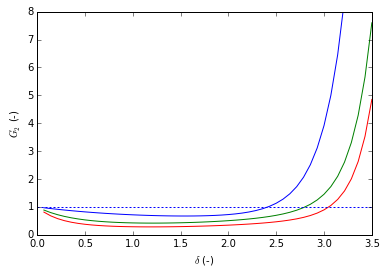

0.1521
8.34200492185e-06 9.26558371452e-06 8.90964653776e-06
8.45676333368e-06 9.3823368939e-06 9.02458409305e-06
8.5712962295e-06 9.49889391734e-06 9.13998574244e-06
8.68559293776e-06 9.61524139613e-06 9.25578750397e-06
8.79964332369e-06 9.73136668358e-06 9.37192995329e-06
8.91343778002e-06 9.8472578486e-06 9.48835789299e-06
9.02696721699e-06 9.96290365024e-06 9.60502004587e-06
9.1402230518e-06 1.00782935131e-05 9.72186877075e-06
9.25319719761e-06 1.01934175037e-05 9.83885979922e-06
9.36588205201e-06 1.03082663072e-05 9.95595199182e-06
9.47827048509e-06 1.04228312053e-05 1.00731071124e-05
9.59035582729e-06 1.05371040541e-05 1.01902896193e-05
9.70213185683e-06 1.06510772634e-05 1.0307466472e-05
9.81359278706e-06 1.07647437755e-05 1.04246069523e-05
9.92473325356e-06 1.08780970454e-05 1.05416824987e-05
1.00355483011e-05 1.0991131021e-05 1.06586665534e-05
1.01460333706e-05 1.11038401242e-05 1.07755344203e-05
1.0256184286e-05 1.12162192315e-05 1.08922631339e-05
1.03659972411e-05 1.13282636

In [47]:
# As in
# Chung, Ting Horng, et al. "Generalized multiparameter correlation for nonpolar and polar fluid transport properties." 
# Industrial & engineering chemistry research 27.4 (1988): 671-679.

from __future__ import print_function
import CoolProp, numpy as np, matplotlib.pyplot as plt
from math import sqrt, exp
%matplotlib inline

a0 = [0, 6.32402, 0.12102e-2, 5.28346, 6.62263, 19.74540, -1.89992, 24.27450, 0.79716, -0.23816, 0.68629e-1]
a1 = [0, 50.41190, -0.11536e-2, 254.20900, 38.09570, 7.63034, -12.53670, 3.44945, 1.11764, 0.67695e-1, 0.34793]
a2 = [0, -51.68010, -0.62571e-2, -168.48100, -8.46414, -14.35440, 4.98529, -11.29130, 0.12348e-1, -0.81630, 0.59256]
a3 = [0, 1189.02000, 0.37283e-1, 3898.27000, 31.41780, 31.52670, -18.15070, 69.34660, -4.11661, 4.02528, -0.72663]

def check_plot(fluid):

    def __G_2(delta):
        Y = delta/6.0
        G_1 = (1.0-0.5*Y)/(1-Y)**3
        G_2 = (A[1]*(1-exp(-A[4]*Y))/Y + A[2]*G_1*exp(A[5]*Y) + A[3]*G_1 )/(A[1]*A[4]+A[2]+A[3])
        return G_2

    for acentric in [0, 0.489, 0.907]:

        A = [0.0]*11
        for i in range(1,11):
            A[i] = a0[i] + a1[i]*acentric + a2[i]*mu_r**4 + a3[i]*kappa

        XXX = np.linspace(0, 3.5)
        YYY = [__G_2(delta) for delta in XXX]
        plt.plot(XXX,YYY,label=str(acentric))

    plt.xlim(0,3.5)
    plt.ylim(0,8)
    plt.axhline(1.0, dashes = [2, 2])
    plt.xlabel(r'$\delta$ (-)')
    plt.ylabel(r'$G_2$ (-)')
    plt.show()
    
check_plot(fluid)

fluid = 'n-Propane'
Vc_cm3mol = 1/(CoolProp.CoolProp.PropsSI('rhomolar_critical', fluid)/1e6)
acentric = CoolProp.CoolProp.PropsSI('acentric', fluid)
M_gmol = CoolProp.CoolProp.PropsSI('molemass', fluid)*1000.0
Tc = CoolProp.CoolProp.PropsSI('Tcrit', fluid)
mu_r = 0
kappa = 0
print(acentric)
    
A = [0.0]*11
for i in range(1,11):
    A[i] = a0[i] + a1[i]*acentric + a2[i]*mu_r**4 + a3[i]*kappa
        
F_c = 1 - 0.2756*acentric + 0.059035*mu_r**4 + kappa
sigma_A = 0.809*Vc_cm3mol**(1.0/3.0)
epsilon_over_k = Tc/1.2593

def chung(T, rho_molm3):
    rho_molcm3 = rho_molm3/1e6
    Tstar = T/epsilon_over_k
    Omega_2_2 = 1.16145*pow(Tstar, -0.14874) + 0.52487*exp(-0.77320*Tstar) + 2.16178*exp(-2.43787*Tstar);
    eta0 = 4.0785e-5*sqrt(M_gmol*T)/(Vc_cm3mol**(2.0/3.0)*Omega_2_2)*F_c
    
    Y = rho_molcm3*Vc_cm3mol/6.0
    G_1 = (1.0-0.5*Y)/(1-Y)**3
    G_2 = (A[1]*(1-exp(-A[4]*Y))/Y + A[2]*G_1*exp(A[5]*Y) + A[3]*G_1 )/(A[1]*A[4]+A[2]+A[3])
    eta_k = eta0*(1/G_2 + A[6]*Y)
    
    eta_p = (36.344e-6*sqrt(M_gmol*Tc)/Vc_cm3mol**(2.0/3.0))*A[7]*Y**2*G_2*exp(A[8] + A[9]/Tstar + A[10]/Tstar**2)

    # Poise to Pa*s
    eta0_Pas = eta0/10.0
    eta_k_Pas = eta_k/10.0
    eta_p_Pas = eta_p/10.0
    return eta0_Pas, eta_k_Pas, eta_p_Pas

for T in np.linspace(300, 500):
    rho = 1000
    eta0, eta_k, eta_p = chung(T, rho)
    print(eta0, eta_k + eta_p, CoolProp.CoolProp.PropsSI("V","T",T,"Dmolar",rho,fluid))
